In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_excel('D:\Стас\Ученье - Свет\Оценка\Аспирантура\Видео по NN, Data mining, ABC и т.д\Распределение Гаусса, регрессия\Python\!Наработки\Выборки_cian\Офисы_ектб/ПСН_Ектб_avito и cian.xlsx', sheet_name = 4)
df

,Цена_1,Цена_2,Прогноз_cat,Прогноз_nn,Цена(кв.м),Цена(кв.м).1,MAE,MAPE,LN(Площадь),Площадь,...,Тип здания,Статус,Аренда_1,Аренда_2,Аномалия,Адрес_1,Адрес_2,Текст,Поиск,Ссылка
0,25000000.0,25000000.0,2.301575e+07,23260090.0,100160.256410,92210.538401,1.984250e+06,0.079370,5.519860,249.6,...,жилой дом,0,нет,нет,0,"Свердловская область, Екатеринбург, ул. Юмашев...","ул. Юмашева, 11",Описание\nПредлагаем к продаже помещение униве...,NaN,https://www.avito.ru/ekaterinburg/kommercheska...
1,36641500.0,36641500.0,3.500339e+07,33752200.0,95000.000000,90752.878404,1.638115e+06,0.044707,5.955060,385.7,...,жилой дом,0,нет,нет,0,"Свердловская область, Екатеринбург, ул. Челюск...","ул. Челюскинцев, 1",Описание\nК продаже предлагается универсальное...,NaN,https://www.avito.ru/ekaterinburg/kommercheska...
2,1047200.0,1047200.0,2.925449e+06,5826413.0,68000.000000,189964.192996,-1.878249e+06,-1.793591,2.734368,15.4,...,административное здание,0,есть,нет,1,"Свердловская область, Екатеринбург, Восточная ...","ул. Восточная, 6",Описание\nПродаём помещение в офисном блоке жи...,NaN,https://www.avito.ru/ekaterinburg/kommercheska...
3,8450000.0,8450000.0,9.715167e+06,10264451.0,65503.875969,75311.369118,-1.265167e+06,-0.149724,4.859812,129.0,...,жилой дом,0,есть,нет,0,"Свердловская область, Екатеринбург, ул. Куйбыш...","ул. Куйбышева, 84к2",Описание\nГОТОВЫЙ БИЗНЕС ИЛИ ИНВЕСТИЦИОННЫЙ ПР...,NaN,https://www.avito.ru/ekaterinburg/kommercheska...
4,18900000.0,18900000.0,1.386445e+07,16750775.0,120382.165605,88308.585223,5.035552e+06,0.266431,5.056246,157.0,...,жилой дом,0,нет,нет,0,"Свердловская область, Екатеринбург, ул. Гагари...","ул. Гагарина, 20А",Описание\nПреимущества:\nРайон с высокой актив...,NaN,https://www.avito.ru/ekaterinburg/kommercheska...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,20000000.0,20000000.0,1.518505e+07,15332333.0,63291.139241,48053.967087,4.814946e+06,0.240747,5.755742,316.0,...,жилой дом,0,есть,нет,0,"Свердловская область, Екатеринбург, улица Фурм...","ул. Фурманова, 26",Объект 118127. Продается универсальное помеще...,NaN,https://www.cian.ru/sale/commercial/278092159
454,23400000.0,23400000.0,2.493225e+07,24425126.0,75728.155340,80686.878932,-1.532246e+06,-0.065481,5.733341,309.0,...,жилой дом,0,нет,нет,0,"Свердловская область, Екатеринбург, улица Авиа...","ул. Авиационная, 59",Продается универсальное помещение на первой ли...,NaN,https://www.cian.ru/sale/commercial/286669769
455,25000000.0,25000000.0,2.490543e+07,29799108.0,85324.232082,85001.457590,9.457293e+04,0.003783,5.680173,293.0,...,жилой дом,0,есть,нет,0,"Свердловская область, Екатеринбург, улица Урал...","ул. Уральская, 3",Объект 164663. Продам универсальное торговое ...,NaN,https://www.cian.ru/sale/commercial/282281430
456,25500000.0,25500000.0,2.657645e+07,28378086.0,76119.402985,79332.674612,-1.076446e+06,-0.042214,5.814131,335.0,...,административное здание,0,нет,нет,0,"Свердловская область, Екатеринбург, улица Шейн...","ул. Шейнкмана, 7",Продажа коммерческого помещения.\nЛокация : г....,NaN,https://www.cian.ru/sale/commercial/254462602


In [3]:
x = df[df['Линия_1'] == '1 линия']['Цена(кв.м)']
y = df[df['Линия_1'] == '2 линия']['Цена(кв.м)']
x.name, y.name = '1 линия', '2 линия'

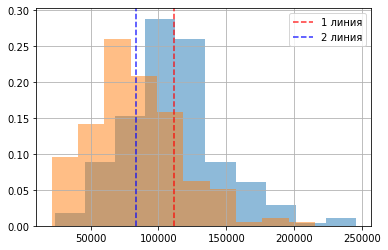

In [4]:
x.hist(alpha = 0.5, weights = [1./len(x)] * len(x))
y.hist(alpha = 0.5, weights = [1./len(y)] * len(y))
plt.axvline(x.mean(), color = 'red', alpha = 0.8, linestyle = 'dashed')
plt.axvline(y.mean(), color = 'blue', alpha = 0.8, linestyle = 'dashed')
plt.legend([x.name, y.name])

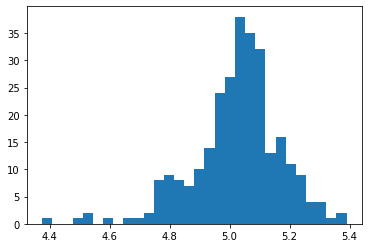

In [7]:
plt.hist(np.log10(x), bins = 30);

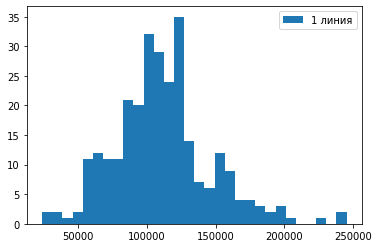

In [16]:
plt.hist(x, bins = 30);
plt.legend([x.name])

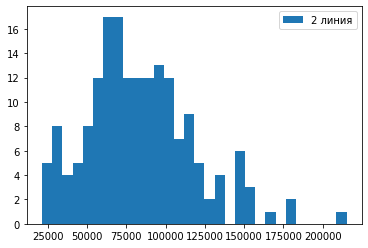

In [15]:
plt.hist(y, bins = 30);
plt.legend([y.name])

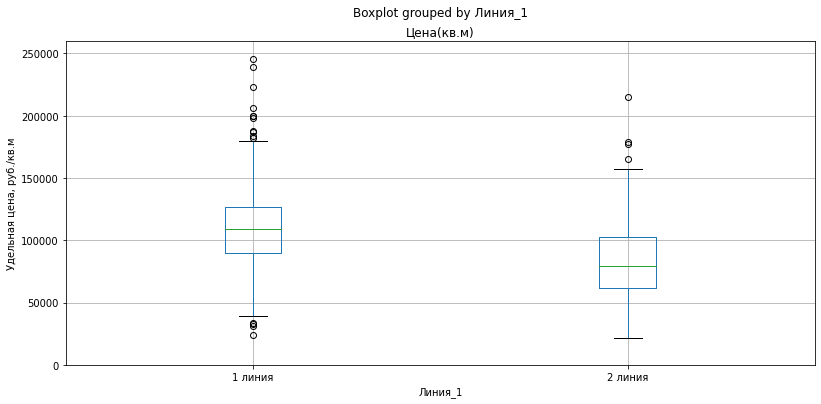

In [20]:
df_line = df[['Цена(кв.м)', 'Линия_1']] # берем 2 столбика с данными
fig, ax = plt.subplots(figsize = (13,6))
df_line.boxplot(column = 'Цена(кв.м)', by = 'Линия_1', ax = ax)
ax.set_ylim(0, 260000)
plt.ylabel('Удельная цена, руб./кв.м')
plt.show()

In [22]:
# Статистика Манна-Уитни
stat, p = stats.mannwhitneyu(x, y)
alfa = 0.05
print("p-level: ", p)
print("Статистика: ", stat)

if p < alfa:
    print("H0 отклоняется, различие между ценами имеется")
else:
    print("H0 принимается, различия между ценами нет")

p-level:  1.6084947174733108e-16
Статистика:  36245.5
H0 отклоняется, различие между ценами имеется


# Bootstrap

In [13]:
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm
import seaborn as sns

plt.style.use('ggplot')

In [20]:
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, # чтобы сохранить дисперсию, берем такой же размер выборки
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) 
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if bar.get_x() <= quants.iloc[0][0] or bar.get_x() >= quants.iloc[1][0]:
        #if abs(bar.get_x()) <= quants.iloc[0][0] or abs(bar.get_x()) >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

In [22]:
sample_1 = df[df['Линия_1'] == '1 линия']['Цена(кв.м)']
sample_2 = df[df['Линия_1'] == '2 линия']['Цена(кв.м)']

sample_1 = pd.DataFrame(sample_1)
sample_2 = pd.DataFrame(sample_2)

In [23]:
print(len(sample_1))
print(len(sample_2))

281
177


In [25]:
sample_2

,Цена(кв.м)
0,100160.256410
2,68000.000000
3,65503.875969
9,28260.869565
11,101049.868766
...,...
443,57097.791798
445,55000.000000
451,25000.000000
454,75728.155340


  0%|          | 0/1000 [00:00<?, ?it/s]

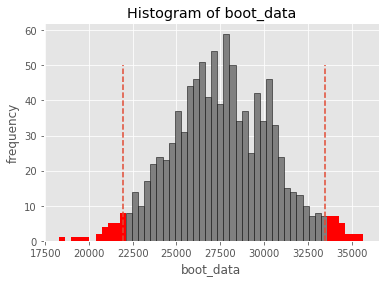

p_value: 9.29471528340589e-22
H0 отклоняется, различие между средними имеется


In [31]:
# в результате хранится разница двух распределений, ДИ и pvalue
booted_data = get_bootstrap(sample_1['Цена(кв.м)'], sample_2['Цена(кв.м)']) 
alfa = 0.05
p = booted_data["p_value"]

print('p_value:', p) # p_value

if p < alfa:
    print("H0 отклоняется, различие между средними имеется")
else:
    print("H0 принимается, различия между средними нет")

In [28]:
booted_data["quants"] # ДИ

,0
0.025,22293.885648
0.975,33218.056208


## тесты на сравнение выборок

In [ ]:
# Статистика Флигнера-Килина (сравнение дисперсий для Стьюдента)
df_groups = df_nb.groupby(by='Материал стен')
g_1 = df_groups['Цена (1 кв.м)'].get_group('Кирпичный')
g_2 = df_groups['Цена (1 кв.м)'].get_group('Панельный')

stat, p = scipy.stats.fligner(g_1, g_2)
alfa = 0.05
print("p-level: ", p)
print("Статистика: ", stat)

if p < alfa:
    print("H0 отклоняется, различие между дисперсиями имеется")
else:
    print("H0 принимается, различия между дисперсиями нет")

In [ ]:
# Статистика Стьюдента (при нормальном распределении)
df_groups = df_nb.groupby(by='Материал стен')
g_1 = df_groups['Цена (1 кв.м)'].get_group('Кирпичный')
g_2 = df_groups['Цена (1 кв.м)'].get_group('Панельный')

stat, p = scipy.stats.ttest_ind(g_1, g_2, equal_var = False)
alfa = 0.05
print("p-level: ", p)
print("Статистика: ", stat)

if p < alfa:
    print("H0 отклоняется, различие между ценами имеется")
else:
    print("H0 принимается, различия между ценами нет")

In [ ]:
# Статистика Манна-Уитни
df_groups = df_nb.groupby(by='Материал стен')
g_1 = df_groups['Цена (1 кв.м)'].get_group('Кирпичный')
g_2 = df_groups['Цена (1 кв.м)'].get_group('Панельный')

stat, p = scipy.stats.mannwhitneyu(g_1, g_2)
alfa = 0.05
print("p-level: ", p)
print("Статистика: ", stat)

if p < alfa:
    print("H0 отклоняется, различие между ценами имеется")
else:
    print("H0 принимается, различия между ценами нет")

In [ ]:
# Статистика Крускала-Уолиса
df_groups = df_nb.groupby(by='Количество комнат')
g_1 = df_groups['Цена (1 кв.м)'].get_group(1)
g_2 = df_groups['Цена (1 кв.м)'].get_group(2)
g_3 = df_groups['Цена (1 кв.м)'].get_group(3)
g_4 = df_groups['Цена (1 кв.м)'].get_group(4)

stat, p = scipy.stats.kruskal(g_1, g_2, g_3, g_4)
alfa = 0.05
print("p-level: ", p)
print("Статистика: ", stat)

if p < alfa:
    print("H0 отклоняется, различие между ценами имеется")
else:
    print("H0 принимается, различия между ценами нет")

## тесты на нормальность

In [ ]:
#Проверим критерий Жака-Бера
stat, p = scipy.stats.jarque_bera(df_nb['Цена (1 кв.м)'])
alfa = 0.05
print("p-level: ", p)
print("Статистика: ", stat)

if p < alfa:
    print("H0 отклоняется, распределение ненормально")
else:
    print("H0 принимается, распределение нормально")

In [ ]:
# Критерий Колмогорова-Смирнова
stat, p = stats.kstest(df['Цена'],'norm')
alfa = 0.05
print("p-level: %.5f" % p)
print("Статистика: ", stat)

if p < alfa:
    print("H0 отклоняется, распределение ненормально")
else:
    print("H0 принимается, распределение нормально")

In [ ]:
# Критерий Шапиро-Уилка, Н0 - распределение нормальное, Н1 - распределение не нормальное. Н0 принимается если p>0.05,
# если p<0.05, то принимаем Н1. 
stat, p = scipy.stats.shapiro(df['Цена'])
alfa = 0.05
print("p-level: %.5f" % p)
print("Статистика: ", stat)

if p < alfa:
    print("H0 отклоняется, распределение ненормально")
else:
    print("H0 принимается, распределение нормально")

In [ ]:
# Критерий Пирсона
stat, p = scipy.stats.chisquare(df['Цена'])
alfa = 0.05
print("p-level: %.5f" % p)
print("Статистика: ", stat)

if p < alfa:
    print("H0 отклоняется, распределение ненормально")
else:
    print("H0 принимается, распределение нормально")

In [ ]:
# Критерий Андерсона-Дарлинга
stat, p = sm.stats.normal_ad(df['Цена'])
alfa = 0.05
print("p-level: %.5f" % p)
print("Статистика: ", stat)

if p < alfa:
    print("H0 отклоняется, распределение ненормально")
else:
    print("H0 принимается, распределение нормально")

## прочие тесты

### **1. Тест Бокса-Льюнга и Бокса-Пирса**
**Цель:** проверка автокорреляции остатков модели.

```python
import statsmodels.api as sm
import numpy as np

# Пример временного ряда
residuals = np.random.randn(100)

# Тест Бокса-Льюнга (lag=10)
ljung_box = sm.stats.acorr_ljungbox(residuals, lags=[10], return_df=True)

print(ljung_box)
```

- **`stat`**: значение статистики теста.
- **`p-value`**: если p < 0.05, отвергаем H₀ — есть автокорреляция (что плохо).
- **H₀**: остатки не автокоррелированы (что хорошо для модели).
- **Ljung-Box** лучше при малых выборках, **Box-Pierce** — его упрощённый вариант.

---

### **2. Тест Бройша-Годфри**
**Цель:** также тестирует автокорреляцию, но более гибко по лагам.

```python
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
import statsmodels.api as sm

# Допустим, у нас есть модель:
X = sm.add_constant(np.arange(100))
y = X[:, 1] * 2 + np.random.randn(100)
model = sm.OLS(y, X).fit()

# Проверим автокорреляцию остатков до 2 лага
stat, p, _, _ = acorr_breusch_godfrey(model, nlags=2)
print(f'Breusch-Godfrey stat={stat:.3f}, p-value={p:.3f}')
```

- **H₀**: отсутствует автокорреляция остатков.
- p < 0.05 — отвергаем H₀, есть автокорреляция.

---

### **3. Тест Голдфельда-Квандта (Goldfeld-Quandt)**
**Цель:** проверка гетероскедастичности.

```python
from statsmodels.stats.diagnostic import het_goldfeldquandt

# X, y как выше
stat, p, _ = het_goldfeldquandt(y, X)
print(f'Goldfeld-Quandt stat={stat:.3f}, p-value={p:.3f}')
```

- **H₀**: дисперсия одинакова (гомоскедастичность).
- p < 0.05 → отвергаем H₀ → есть гетероскедастичность.

---

### **4. Тест Дарбина-Уотсона**
**Цель:** проверка на первую автокорреляцию.

```python
from statsmodels.stats.stattools import durbin_watson

residuals = model.resid
dw = durbin_watson(residuals)
print(f'Durbin-Watson stat={dw:.3f}')
```

- Диапазон 0–4.
  - 2 — нет автокорреляции.
  - <2 — положительная автокорреляция.
  - >2 — отрицательная автокорреляция.

---

### **5. Тест Дикки-Фуллера (ADF)**
**Цель:** проверка стационарности ряда.

```python
from statsmodels.tsa.stattools import adfuller

result = adfuller(y)
print(f'ADF Statistic: {result[0]:.3f}')
print(f'p-value: {result[1]:.3f}')
```

- **H₀**: ряд нестационарен (есть единичный корень).
- p < 0.05 → отвергаем H₀ → ряд стационарен.

---

### **6. Крамера-Мизеса-Смирнова**
**Цель:** сравнение эмпирического распределения с теоретическим.

```python
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import cramervonmises

x = np.random.normal(0, 1, 100)
result = cramervonmises(x, 'norm')
print(f'Cramér–von Mises stat={result.statistic:.3f}, p-value={result.pvalue:.3f}')
```

- **H₀**: распределение совпадает с нормальным.
- p < 0.05 → отвергаем H₀ → распределение отличается.

---

### **7. Тест Рамсея (RESET)**
**Цель:** проверка на спецификацию модели (недостающие переменные).

```python
from statsmodels.stats.diagnostic import linear_reset

reset = linear_reset(model, power=2, use_f=True)
print(f'Reset test stat={reset.statistic:.3f}, p-value={reset.pvalue:.3f}')
```

- **H₀**: модель корректно специфицирована.
- p < 0.05 → отвергаем H₀ → модель неполная.

---

### **8. Тест Уайта (White test)**
**Цель:** проверка гетероскедастичности.

```python
from statsmodels.stats.diagnostic import het_white

stat, p, _, _ = het_white(model.resid, model.model.exog)
print(f'White test stat={stat:.3f}, p-value={p:.3f}')
```

- **H₀**: ошибки гомоскедастичны.
- p < 0.05 → отвергаем H₀ → есть гетероскедастичность.

---

### **9. Тест Флинера-Киллина (Fligner-Killeen)**
**Цель:** сравнение дисперсий без зависимости от нормальности.

```python
from scipy.stats import fligner

group1 = np.random.normal(10, 2, 50)
group2 = np.random.normal(10, 4, 50)

stat, p = fligner(group1, group2)
print(f'Fligner-Killeen stat={stat:.3f}, p-value={p:.3f}')
```

- **H₀**: дисперсии равны.
- p < 0.05 → отвергаем H₀ → дисперсии различаются.

---

### **10. Тест Фридмана**
**Цель:** сравнение >2 зависимых выборок (альтернатива ANOVA для рангов).

```python
from scipy.stats import friedmanchisquare

group1 = [1, 2, 3]
group2 = [2, 2, 3]
group3 = [3, 3, 4]

stat, p = friedmanchisquare(group1, group2, group3)
print(f'Friedman stat={stat:.3f}, p-value={p:.3f}')
```

- **H₀**: нет различий между выборками.
- p < 0.05 → есть статистически значимые различия.

---

### Дополнительные тесты (с краткими пояснениями):

#### **KPSS-тест** (на стационарность):
```python
from statsmodels.tsa.stattools import kpss

stat, p, _, _ = kpss(y, regression='c')
print(f'KPSS stat={stat:.3f}, p-value={p:.3f}')
```
- **H₀**: ряд стационарен.
- p < 0.05 → отвергаем H₀ → ряд нестационарен.

#### **Phillips–Perron тест**:
```python
from statsmodels.tsa.stattools import phillips_perron

stat, p = phillips_perron(y)
print(f'PP test stat={stat:.3f}, p-value={p:.3f}')
```
- То же, что ADF, но менее чувствителен к автокорреляции остатков.

#### **Breusch-Pagan test**:
```python
from statsmodels.stats.diagnostic import het_breuschpagan

stat, p, _, _ = het_breuschpagan(model.resid, model.model.exog)
print(f'Breusch-Pagan stat={stat:.3f}, p-value={p:.3f}')
```

#### **Levene’s test**:
```python
from scipy.stats import levene

stat, p = levene(group1, group2)
print(f'Levene test stat={stat:.3f}, p-value={p:.3f}')
```

#### **Chow test** (тест структурных сдвигов):
Для этого нужен специальный код с разбиением данных на 2 части. Можем разобрать отдельно, если хочешь.

---

Хочешь, я оформлю всё это в виде `.ipynb` файла или вывода в консоли с метками? Или выбрать ключевые тесты под задачи анализа недвижимости (например: стационарность, автокорреляция, мультиколлинеарность, спецификация модели)?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import pylab

%matplotlib inline

In [121]:
df = pd.read_excel('D:\Стас\Ученье - Свет\Оценка\Аспирантура\Видео по NN, Data mining, ABC и т.д\Распределение Гаусса, регрессия\Python\!Наработки\Конкурс/Case IV_Kapralin S.G._Model.xlsx', sheet_name = 27)
df

,Дата,Цена_aapl,Ri,События,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,2008-06-02,6.65,-,NaN,NaN,Ниже приведен графический анализ цены акций AA...,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaT,NaT,NaN,NaT,NaT,NaT,NaT
1,2008-06-03,6.62,-0.451128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaT,NaT,NaN,NaT,NaT,NaT,NaT
2,2008-06-04,6.61,-0.151057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaT,NaT,NaN,NaT,NaT,NaT,NaT
3,2008-06-05,6.77,2.420575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaT,NaT,NaN,NaT,NaT,NaT,NaT
4,2008-06-06,6.63,-2.067947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaT,NaT,NaN,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2009-01-26,3.20,1.265823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaT,NaT,NaN,NaT,NaT,NaT,NaT
166,2009-01-27,3.24,1.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaT,NaT,NaN,NaT,NaT,NaT,NaT
167,2009-01-28,3.36,3.703704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaT,NaT,NaN,NaT,NaT,NaT,NaT
168,2009-01-29,3.32,-1.190476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaT,NaT,NaN,NaT,NaT,NaT,NaT


In [122]:
df = df.iloc[5:-2]
df

,Дата,Цена_aapl,Ri,События,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
5,2008-06-09,6.49,-2.111614,С_1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaT,NaT,NaN,NaT,NaT,NaT,NaT
6,2008-06-10,6.63,2.157165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaT,NaT,NaN,NaT,NaT,NaT,NaT
7,2008-06-11,6.46,-2.564103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2008-07-21 00:00:00,2008-07-22,2008-12-16 00:00:00,2009-01-06,2008-09-08,2008-09-15 00:00:00,2008-11-05,2008-11-21,2008-10-10,2008-10-13
8,2008-06-12,6.19,-4.179567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2008-07-21 00:00:00,2008-07-22,2008-12-16 00:00:00,2009-01-06,2008-09-08,2008-09-15 00:00:00,2008-11-05,2008-11-21,2008-10-10,2008-10-13
9,2008-06-13,6.16,-0.484653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaT,NaT,NaN,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2009-01-22,3.16,6.756757,С_14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaT,NaT,NaN,NaT,NaT,NaT,NaT
164,2009-01-23,3.16,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaT,NaT,NaN,NaT,NaT,NaT,NaT
165,2009-01-26,3.20,1.265823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaT,NaT,NaN,NaT,NaT,NaT,NaT
166,2009-01-27,3.24,1.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaT,NaT,NaN,NaT,NaT,NaT,NaT


Среднее: -0.33285693089935275
Медиана: -0.48465266558966474
Сумма: -54.255679736594494


C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


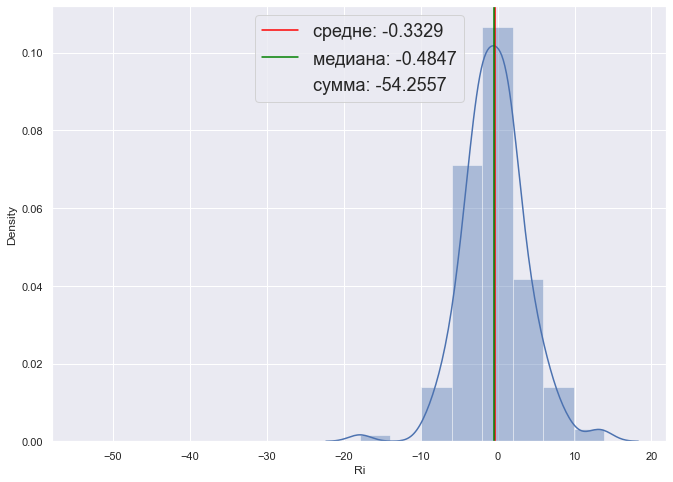

In [123]:
print('Среднее:', df['Ri'].mean())
print('Медиана:', df['Ri'].median())
print('Сумма:', df['Ri'].sum())

mean = round(df['Ri'].mean(), 4)
median = round(df['Ri'].median(), 4)
summ = round(df['Ri'].sum(), 4)
 
#f"среднее - {mean}"

sns.set()
plt.figure(figsize = (11, 8))
sns.distplot(df['Ri'], bins = 8)

plt.axvline(df['Ri'].mean(), color = 'red', label = f"средне: {mean}")
plt.axvline(df['Ri'].median(), color = 'green', label = f"медиана: {median}")
plt.axvline(df['Ri'].sum(), color = 'green', label = f"сумма: {summ}", alpha = 0.0)
#plt.plot(lengths, y_pos, marker="D", linestyle="", alpha=0.8, color="r")
plt.legend(prop = {'size': 18})

In [23]:
x = df['до события']
y = df['после события']
x.name, y.name = 'до события', 'после события'

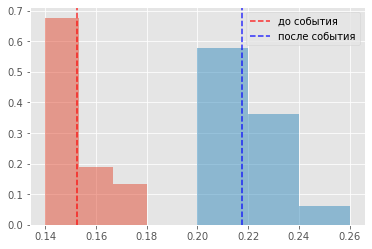

In [24]:
x.hist(alpha = 0.5, weights = [1./len(x)] * len(x), bins = 3)
y.hist(alpha = 0.5, weights = [1./len(y)] * len(y), bins = 3)
plt.axvline(x.mean(), color = 'red', alpha = 0.8, linestyle = 'dashed')
plt.axvline(y.mean(), color = 'blue', alpha = 0.8, linestyle = 'dashed')
plt.legend([x.name, y.name])

  0%|          | 0/1000 [00:00<?, ?it/s]

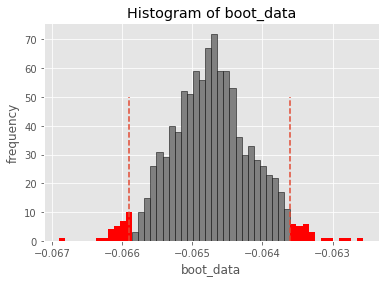

p_value: 0.0
H0 отклоняется, различие между средними имеется


In [25]:
# в результате хранится разница двух распределений, ДИ и pvalue
booted_data = get_bootstrap(x, y) 
alfa = 0.05
p = booted_data["p_value"]

print('p_value:', p) # p_value

if p < alfa:
    print("H0 отклоняется, различие между средними имеется")
else:
    print("H0 принимается, различия между средними нет")

In [19]:
booted_data

{'boot_data': [-3.703660000000002,
  -3.367920000000003,
  -3.737640000000003,
  -3.670510000000003,
  -4.199270000000003,
  -3.6559400000000024,
  -3.7587100000000038,
  -3.3484800000000026,
  -3.677510000000003,
  -3.9012400000000036,
  -3.799790000000003,
  -3.927750000000003,
  -4.289490000000003,
  -3.590140000000002,
  -3.458300000000003,
  -4.053510000000003,
  -3.8921600000000036,
  -3.8376600000000027,
  -3.842060000000004,
  -3.757460000000003,
  -3.7879400000000025,
  -3.3263500000000032,
  -3.809060000000003,
  -4.213560000000003,
  -3.980730000000002,
  -4.030160000000003,
  -3.580960000000003,
  -3.797300000000003,
  -3.839620000000003,
  -3.5405700000000024,
  -4.106120000000002,
  -3.778720000000003,
  -3.859180000000003,
  -3.7773100000000026,
  -3.6998400000000027,
  -3.4221200000000027,
  -3.4602300000000024,
  -3.7603900000000032,
  -4.093730000000003,
  -3.637590000000003,
  -3.8114200000000036,
  -3.7170700000000023,
  -3.7344100000000027,
  -3.9908100000000033,
 